In [71]:
# Dataset taken from Kaggle

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df_train = pd.read_excel('E:/KaggleCompetitions/FlightPricePredictions/Data_Train.xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [74]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [75]:
# There are almost all the object datatypes excluding price. Now, we can check for datetime columns: Date_of_Journey, 
# Arrival_Time, Dep_Time

In [76]:
df_train[['Date_of_Journey', 'Arrival_Time', 'Dep_Time']].head()

,Date_of_Journey,Arrival_Time,Dep_Time
0,24/03/2019,01:10 22 Mar,22:20
1,1/05/2019,13:15,05:50
2,9/06/2019,04:25 10 Jun,09:25
3,12/05/2019,23:30,18:05
4,01/03/2019,21:35,16:50


In [77]:
# Separating date, month and year into different columns from Date_of_Journey to check behaviour at different 
# months and same date, etc different combinations.

In [78]:
list_date = ['Date_of_Journey', 'Arrival_Time', 'Dep_Time']

In [79]:
for i in list_date:
    df_train[i] = pd.to_datetime(df_train[i])
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [80]:
df_train['journey_day']=df_train['Date_of_Journey'].dt.day
df_train['journey_month']=df_train['Date_of_Journey'].dt.month
df_train['journey_year']=df_train['Date_of_Journey'].dt.year

df_train[['journey_day', 'journey_month', 'journey_year']].head()

,journey_day,journey_month,journey_year
0,24,3,2019
1,5,1,2019
2,6,9,2019
3,5,12,2019
4,3,1,2019


In [81]:
df_train['journey_year'].value_counts()

2019    10683
Name: journey_year, dtype: int64

In [82]:
df_train['journey_month'].value_counts()

6     2536
3     2211
5     2074
9     1406
1     1075
12     957
4      424
Name: journey_month, dtype: int64

In [83]:
df_train['journey_day'].value_counts()

6     2166
5     1392
3     1361
27    1130
21    1111
24    1052
15     984
18     832
4      655
Name: journey_day, dtype: int64

In [84]:
# Range of time period of data, we have
print(df_train['Date_of_Journey'].max())
print(df_train['Date_of_Journey'].min())

2019-12-06 00:00:00
2019-01-03 00:00:00


In [85]:
#checking null values in all the columns

In [86]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
journey_day        0
journey_month      0
journey_year       0
dtype: int64

In [87]:
# Extraction of hour and seconds from timestamp columns

In [88]:
list_time = ['Dep_Time', 'Arrival_Time']
for i in list_time:
#     try:
    df_train[i + '_hour'] = df_train[i].dt.hour
    df_train[i + '_hour'] = df_train[i].dt.minute
    #df_train = df_train.drop(i, axis = 1, inplace = True)
#     except:
#         pass

In [89]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Arrival_Time_hour
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-06-18 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,20,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-18 05:50:00,2023-06-18 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,50,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-18 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,25,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-06-18 18:05:00,2023-06-18 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019,5,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-06-18 16:50:00,2023-06-18 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019,50,35


EDA

In [90]:
# Analyse if duration impacts price (target)

In [91]:
df_train['Duration'].max()

'9h 5m'

In [92]:
df_train['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
19h 50m      1
42h 5m       1
35h 20m      1
40h 20m      1
29h 40m      1
Name: Duration, Length: 368, dtype: int64

In [93]:
# df_train['Duration_mins'] = int(str(df_train['Duration']).split('h')[0])*60+int(str(df_train['Duration']).split('h')[-1].replace(' ','').replace('m', ''))

In [94]:
list2 = []
for i in range(len(df_train['Duration'])):
    print(i)
    try:
#         print(int(str(df_train['Duration'][i]).split('h')[-1].replace(' ','').replace('m', '')))
        list2.append(int(str(df_train['Duration'][i]).split('h')[0])*60 + int(str(df_train['Duration'][i]).split('h')[-1].replace(' ','').replace('m', '')))
    except:
        if 'm' not in df_train['Duration'][i]:
            list2.append(int(str(df_train['Duration'][i]).split('h')[0])*60)
        elif 'h' not in df_train['Duration'][i]:
            list2.append(int(str(df_train['Duration'][i]).split('m')[0]))
        else:
            list2.append('')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [95]:
len(list2)

10683

In [96]:
len(df_train)

10683

In [97]:
df_train['Duration_mins'] = list2
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Arrival_Time_hour,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-06-18 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,20,10,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-18 05:50:00,2023-06-18 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,50,15,445
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-18 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,25,25,1140
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-06-18 18:05:00,2023-06-18 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019,5,30,325
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-06-18 16:50:00,2023-06-18 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019,50,35,285


In [98]:
#count of flights fly at early morning, morning, noon, evening, night, late night 

In [99]:
list3=[]
def departuretimezone(i):
#     for i in df_train[z]:
    if 4<i<8:
        return('early morning')
    elif 8<i<12:
        return('morning')
    elif 12<i<116:
        return('noon')
    elif 16<i<20:
        return('evening')
    elif 20<i<24:
        return('night')
    else:
        return('late night')

<AxesSubplot:>

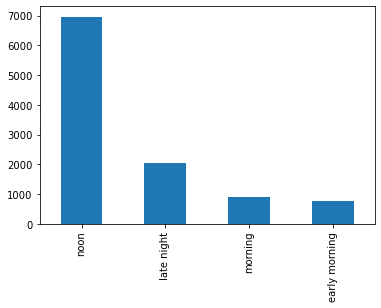

In [100]:
df_train['Dep_Time_hour'].apply(departuretimezone).value_counts().plot(kind = 'bar')

<AxesSubplot:>

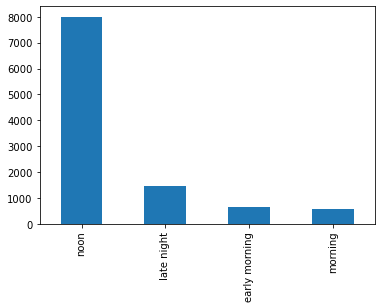

In [101]:
df_train['Arrival_Time_hour'].apply(departuretimezone).value_counts().plot(kind = 'bar')

In [102]:
# Hence, there are no flights departing or landing at evening and in night time.
# Most busy or peak time of the flights in noon time and least at morning.

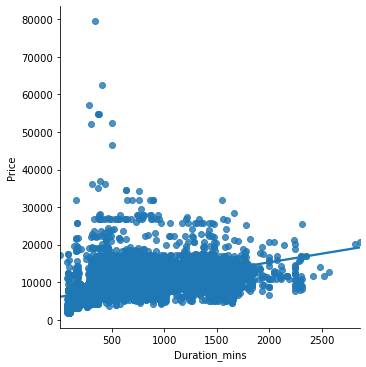

In [103]:
# if Duration affecting/effecting Price(Target)
sns.lmplot(x = 'Duration_mins', y = 'Price', data = df_train)

<AxesSubplot:>

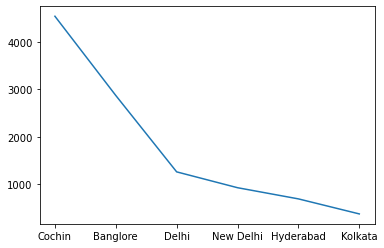

In [104]:
df_train['Destination'].value_counts().plot()

C:\Users\Ish Mayank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Destination', ylabel='count'>

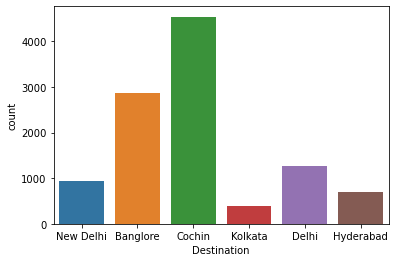

In [105]:
sns.countplot(df_train['Destination'])

In [106]:
# Hence, most busy destination airport is Cochin.

<AxesSubplot:ylabel='Source'>

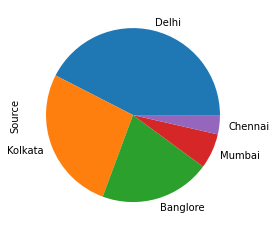

In [107]:
df_train['Source'].value_counts().plot(kind = 'pie')

In [108]:
# Hence, most busy source airport is Delhi.

In [109]:
# Count of different airlines having destination at Cochin airport?
df_train[df_train['Destination'] == 'Cochin'].groupby('Airline').size().sort_values(ascending = False)

Airline
Jet Airways                          1586
Multiple carriers                    1196
Air India                             747
IndiGo                                705
SpiceJet                               87
Air Asia                               80
GoAir                                  76
Vistara                                45
Multiple carriers Premium economy      13
Jet Airways Business                    2
dtype: int64

In [110]:
# Count of different airlines having Source at Delhi airport?
df_train[df_train['Source'] == 'Delhi'].groupby('Airline').size().sort_values(ascending = False)

Airline
Jet Airways                          1586
Multiple carriers                    1196
Air India                             747
IndiGo                                705
SpiceJet                               87
Air Asia                               80
GoAir                                  76
Vistara                                45
Multiple carriers Premium economy      13
Jet Airways Business                    2
dtype: int64

In [111]:
# Different routes for Source airport at Delhi
df_train[df_train['Source'] == 'Delhi'].groupby('Route').size().sort_values(ascending = False)

Route
DEL → BOM → COK                2376
DEL → HYD → COK                 326
DEL → JAI → BOM → COK           240
DEL → BLR → COK                 232
DEL → COK                       213
DEL → AMD → BOM → COK           205
DEL → MAA → COK                 146
DEL → IDR → BOM → COK            99
DEL → HYD → MAA → COK            83
DEL → NAG → BOM → COK            71
DEL → GOI → BOM → COK            58
DEL → HYD → BOM → COK            56
DEL → BHO → BOM → COK            50
DEL → CCU → BOM → COK            44
DEL → PNQ → COK                  42
DEL → LKO → BOM → COK            41
DEL → ATQ → BOM → COK            40
DEL → JDH → BOM → COK            37
DEL → BDQ → BOM → COK            28
DEL → AMD → COK                  25
DEL → UDR → BOM → COK            18
DEL → LKO → COK                  17
DEL → RPR → NAG → BOM → COK      17
DEL → TRV → COK                  16
DEL → MAA → BOM → COK            16
DEL → IXC → BOM → COK            13
DEL → IXU → BOM → COK            12
DEL → GWL → IDR → BOM 

In [112]:
# Different routes for Destination airport at Cochin
df_train[df_train['Destination'] == 'Cochin'].groupby('Route').size().sort_values(ascending = False)

Route
DEL → BOM → COK                2376
DEL → HYD → COK                 326
DEL → JAI → BOM → COK           240
DEL → BLR → COK                 232
DEL → COK                       213
DEL → AMD → BOM → COK           205
DEL → MAA → COK                 146
DEL → IDR → BOM → COK            99
DEL → HYD → MAA → COK            83
DEL → NAG → BOM → COK            71
DEL → GOI → BOM → COK            58
DEL → HYD → BOM → COK            56
DEL → BHO → BOM → COK            50
DEL → CCU → BOM → COK            44
DEL → PNQ → COK                  42
DEL → LKO → BOM → COK            41
DEL → ATQ → BOM → COK            40
DEL → JDH → BOM → COK            37
DEL → BDQ → BOM → COK            28
DEL → AMD → COK                  25
DEL → UDR → BOM → COK            18
DEL → LKO → COK                  17
DEL → RPR → NAG → BOM → COK      17
DEL → TRV → COK                  16
DEL → MAA → BOM → COK            16
DEL → IXC → BOM → COK            13
DEL → IXU → BOM → COK            12
DEL → GWL → IDR → BOM 

In [113]:
df_train['Airline'].value_counts().sort_values(ascending = False)

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [114]:
# Maximum fly is of Jet Airways airline.

In [115]:
# Jet airways have different routs
df_train[df_train['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending = False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
DEL → JAI → BOM → COK    207
BOM → HYD                207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
BOM → BDQ → DEL → HYD      2
DEL → DED → BOM → COK      2
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → VNS → DEL → HYD      1
BOM → DED → DEL → HYD      1
DEL → CCU → BOM → COK      1
dtype: int64

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.,  90000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

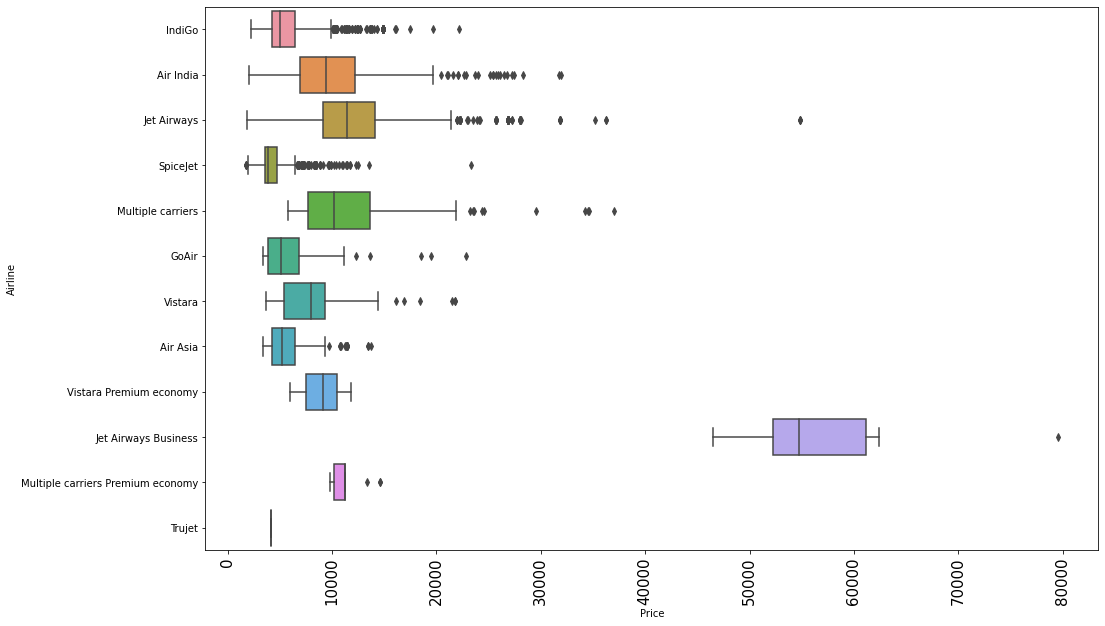

In [116]:
# Airline VS Price
plt.figure(figsize=(16,10))
sns.boxplot(x = 'Price', y = 'Airline', data = df_train)
plt.xticks(rotation = 90, fontsize = 18)
plt.xticks(fontsize = 15)

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

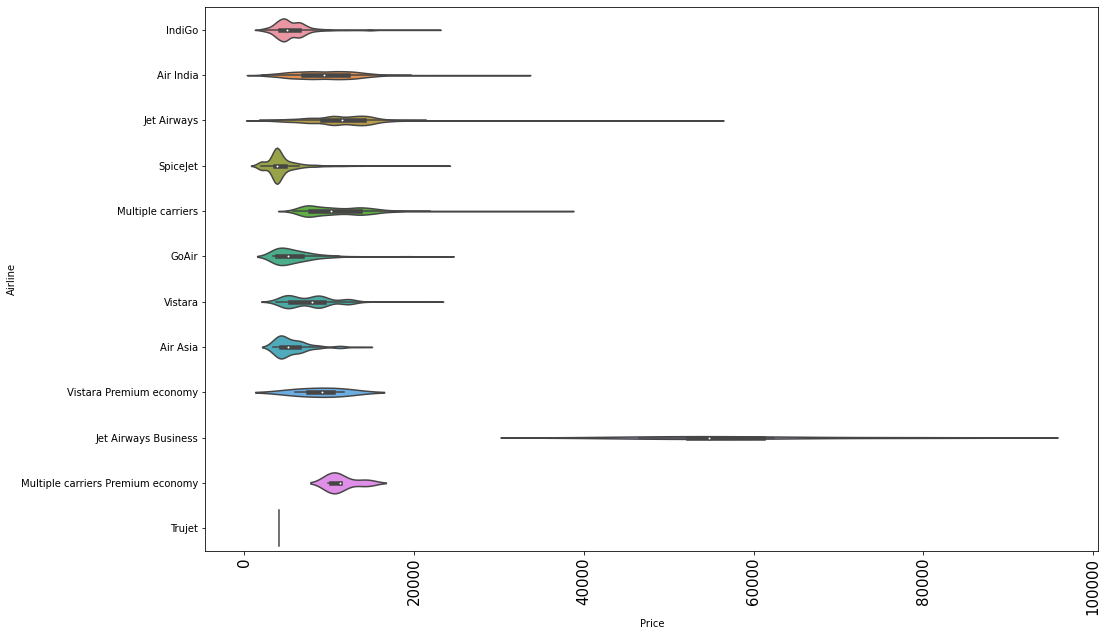

In [117]:
# Airline VS Price
plt.figure(figsize=(16,10))
sns.violinplot(x = 'Price', y = 'Airline', data = df_train)
plt.xticks(rotation = 90, fontsize = 18)
plt.xticks(fontsize = 15)

# Feature Engineering

In [118]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Arrival_Time_hour,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-06-18 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,20,10,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-18 05:50:00,2023-06-18 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,50,15,445
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-18 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,25,25,1140
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-06-18 18:05:00,2023-06-18 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019,5,30,325
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-06-18 16:50:00,2023-06-18 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019,50,35,285


In [119]:
(df_train['Additional_Info'].value_counts()/len(df_train)) *100

No info                         78.114762
In-flight meal not included     18.552841
No check-in baggage included     2.995413
1 Long layover                   0.177853
Change airports                  0.065525
Business class                   0.037443
No Info                          0.028082
1 Short layover                  0.009361
Red-eye flight                   0.009361
2 Long layover                   0.009361
Name: Additional_Info, dtype: float64

In [120]:
# 78.11 % of records in data are without Additional info. Rest of most flights don't have the meals included.

In [121]:
# check for the datatypes
for i in df_train.columns:
    print(i + ' :  ', df_train[i].dtype)

Airline :   object
Date_of_Journey :   datetime64[ns]
Source :   object
Destination :   object
Route :   object
Dep_Time :   datetime64[ns]
Arrival_Time :   datetime64[ns]
Duration :   object
Total_Stops :   object
Additional_Info :   object
Price :   int64
journey_day :   int64
journey_month :   int64
journey_year :   int64
Dep_Time_hour :   int64
Arrival_Time_hour :   int64
Duration_mins :   int64


In [122]:
df_train['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [123]:
df_train['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [124]:
(df_train['Total_Stops'].value_counts()/len(df_train)) *100

1 stop      52.653749
non-stop    32.678087
2 stops     14.228213
3 stops      0.421230
4 stops      0.009361
Name: Total_Stops, dtype: float64

In [125]:
# There are 52.65% flights having 1 stop and 32.67% are non-stop flights.

In [126]:
df_train.groupby(['Airline'])['Price'].mean()

Airline
Air Asia                              5590.260188
Air India                             9611.210616
GoAir                                 5861.056701
IndiGo                                5673.682903
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4338.284841
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64

In [127]:
df_train.groupby(['Airline'])['Price'].std()

Airline
Air Asia                              2027.362290
Air India                             3900.952942
GoAir                                 2703.585767
IndiGo                                2264.142168
Jet Airways                           4258.940578
Jet Airways Business                 11667.596748
Multiple carriers                     3721.234997
Multiple carriers Premium economy     1717.153936
SpiceJet                              1849.922514
Trujet                                        NaN
Vistara                               2914.298578
Vistara Premium economy               2915.405518
Name: Price, dtype: float64

In [128]:
list1 = df_train.groupby(['Airline'])['Price'].std().sort_values().index
list1

Index(['Multiple carriers Premium economy', 'SpiceJet', 'Air Asia', 'IndiGo',
       'GoAir', 'Vistara', 'Vistara Premium economy', 'Multiple carriers',
       'Air India', 'Jet Airways', 'Jet Airways Business', 'Trujet'],
      dtype='object', name='Airline')

In [129]:
# COnverting Airlines from cat to continuous variables
dict2 = {m:n for m,n in enumerate(list1,0)}
list2 = df_train['Airline'].map(dict2)
list2

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
10678    NaN
10679    NaN
10680    NaN
10681    NaN
10682    NaN
Name: Airline, Length: 10683, dtype: object

In [130]:
df_train['Airline'].value_counts

<bound method IndexOpsMixin.value_counts of 0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10683, dtype: object>